In [1]:
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt

In [4]:
import random

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
print(mnist.train.num_examples)

55000


In [7]:
nb_classes = 10

In [8]:
X = tf.placeholder(shape=[None, 784], dtype=tf.float32, name='X')

In [9]:
Y = tf.placeholder(shape=[None, nb_classes], dtype=tf.int32, name='Y')

In [10]:
W = tf.Variable(tf.random_normal(shape=[784, nb_classes]), shape=[784, nb_classes], dtype=tf.float32, name='weight')

In [11]:
b = tf.Variable(tf.random_normal(shape=[nb_classes]), shape=[nb_classes], dtype=tf.float32, name='weight')

In [12]:
logits = tf.matmul(X, W) + b

In [13]:
hypothesis = tf.nn.softmax(logits)

In [14]:
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [15]:
cost = tf.reduce_mean(cost_i)

In [16]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [17]:
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))

Instructions for updating:
Use `tf.math.argmax` instead


In [18]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [19]:
# parameters

In [20]:
training_epochs = 15

In [21]:
batch_size = 100

Epoch: 0001 cost = 2.773690634
Accuracy:  0.7595
Epoch: 0002 cost = 1.061081328
Accuracy:  0.8195
Epoch: 0003 cost = 0.850349223
Accuracy:  0.8406
Epoch: 0004 cost = 0.745074652
Accuracy:  0.8513
Epoch: 0005 cost = 0.678411496
Accuracy:  0.8624
Epoch: 0006 cost = 0.630732971
Accuracy:  0.8692
Epoch: 0007 cost = 0.594235782
Accuracy:  0.8748
Epoch: 0008 cost = 0.566522950
Accuracy:  0.8786
Epoch: 0009 cost = 0.543278522
Accuracy:  0.8806
Epoch: 0010 cost = 0.523957865
Accuracy:  0.8803
Epoch: 0011 cost = 0.507537337
Accuracy:  0.8848
Epoch: 0012 cost = 0.493300725
Accuracy:  0.8842
Epoch: 0013 cost = 0.480752906
Accuracy:  0.8865
Epoch: 0014 cost = 0.469483163
Accuracy:  0.8888
Epoch: 0015 cost = 0.459575000
Accuracy:  0.8892
Label: [6]
[[3.7309840e-09 1.6764079e-06 1.0783254e-04 5.7947591e-07 4.9273547e-02
  8.0298581e-05 9.4879073e-01 1.4920323e-06 1.9693287e-04 1.5469760e-03]]
Prediction: [6]


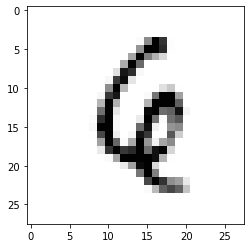

In [23]:
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
        # Test he model using test sets
        print('Accuracy: ', accuracy.eval(session=sess, feed_dict={X:mnist.test.images, Y: mnist.test.labels}))
        #print('Accuracy: ', sess.run(accuracy, feed_dict={X:mnist.test.images, Y: mnist.test.labels}))
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples -1)
   
    print('Label:', sess.run(tf.arg_max(mnist.test.labels[r:r+1], 1)))
    print(sess.run(hypothesis, feed_dict={X: mnist.test.images[r:r+1]}))
    print('Prediction:', sess.run(tf.arg_max(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1]}))
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.show()